# Feature Engineering with Robyn

This notebook demonstrates how to use the feature engineering functionality with plotting capabilities.


In [1]:
import sys

# Add Robyn to path
sys.path.append("/Users/sumalreddy/workspace/Robyn/python/src")

In [2]:
import sys
import pandas as pd
from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.enums import AdstockType
%matplotlib inline

2024-11-15 02:08:33,337 - robyn - INFO - Logging is set up to console only.
/Users/sumalreddy/workspace/Robyn/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load simulated data
dt_simulated_weekly = pd.read_csv("resources/dt_simulated_weekly.csv")
dt_prophet_holidays = pd.read_csv("resources/dt_prophet_holidays.csv")

In [4]:
# Setup MMM Data
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",
    dep_var_type="revenue",
    date_var="DATE",
    context_vars=["competitor_sales_B", "events"],
    paid_media_spends=["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    paid_media_vars=["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    organic_vars=["newsletter"],
    window_start="2016-01-01",
    window_end="2018-12-31",
    factor_vars=["events"]
)

mmm_data = MMMData(data=dt_simulated_weekly, mmmdata_spec=mmm_data_spec)


Rolling Window Start Index: 6
Rolling Window End Index: 162


In [5]:
# Setup Hyperparameters
hyperparameters = Hyperparameters(
    {
        "facebook_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "print_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "tv_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "search_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "ooh_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    train_size=[0.5, 0.8]
)

In [6]:
# Setup Holidays Data
holidays_data = HolidaysData(
    dt_holidays=dt_prophet_holidays,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="DE",
    prophet_signs=["default", "default", "default"]
)

## feature engineering

2024-11-15 02:08:34,942 - root - INFO - Robyn initialized with working directory: ./output
2024-11-15 02:08:34,943 - robyn.data.validation.mmmdata_validation - INFO - Starting complete MMMData validation
2024-11-15 02:08:34,945 - robyn.data.validation.mmmdata_validation - INFO - Missing and infinite value check passed successfully
2024-11-15 02:08:34,946 - robyn.data.validation.mmmdata_validation - INFO - No-variance check passed successfully
2024-11-15 02:08:34,947 - robyn.data.validation.mmmdata_validation - INFO - Variable names validation passed successfully
2024-11-15 02:08:34,947 - robyn.data.validation.mmmdata_validation - INFO - Date variable validation passed successfully
2024-11-15 02:08:34,948 - robyn.data.validation.mmmdata_validation - INFO - Dependent variable validation passed successfully
2024-11-15 02:08:34,948 - robyn.data.validation.mmmdata_validation - INFO - All validations passed successfully
2024-11-15 02:08:34,949 - robyn.data.validation.holidays_data_validation

Validation complete


/Users/sumalreddy/workspace/Robyn/.venv/lib/python3.12/site-packages/prophet/forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
2024-11-15 02:08:35,439 - cmdstanpy - DEBUG - input tempfile: /var/folders/4q/8q62cmhx12n25wftc1qg947m0000gn/T/tmpiwfrnk4n/0m7z3s5p.json
2024-11-15 02:08:35,447 - cmdstanpy - DEBUG - input tempfile: /var/folders/4q/8q62cmhx12n25wftc1qg947m0000gn/T/tmpiwfrnk4n/o0o1qtn1.json
2024-11-15 02:08:35,448 - cmdstanpy - DEBUG - idx 0
2024-11-15 02:08:35,448 - cmdstanpy - DEBUG - running CmdStan, num_threads: None
2024-11-15 02:08:35,449 - cmdstanpy - DEBUG - CmdStan args: ['/Users/sumalreddy/workspace/Robyn/.venv/lib/python3.12/site-packages/prophet/stan_model

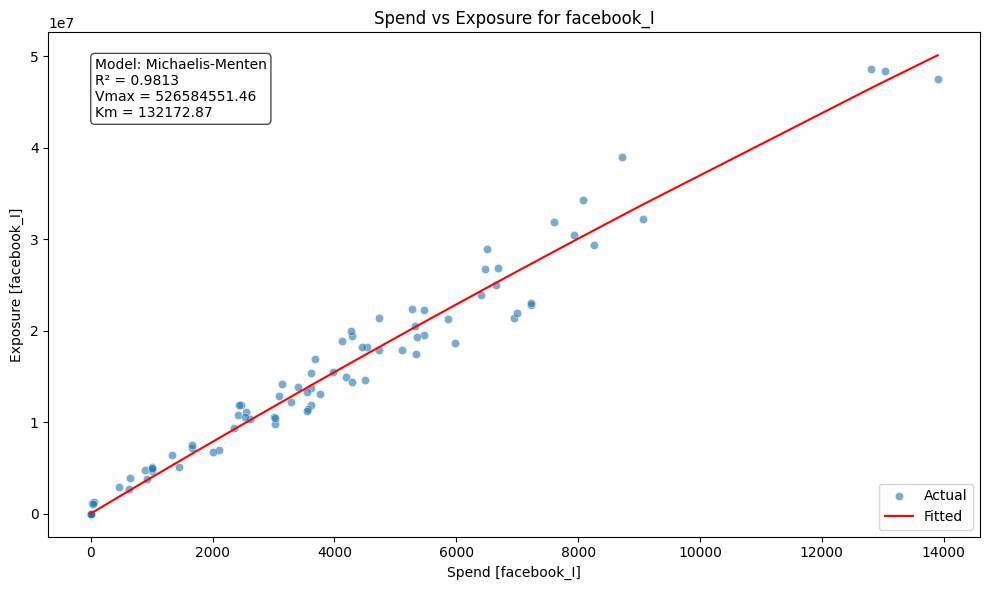

2024-11-15 02:08:35,838 - robyn.visualization.feature_visualization - INFO - Generating spend-exposure plot for channel: search_clicks_P
2024-11-15 02:08:36,004 - robyn.visualization.feature_visualization - INFO - Successfully generated spend-exposure plot for channel search_clicks_P


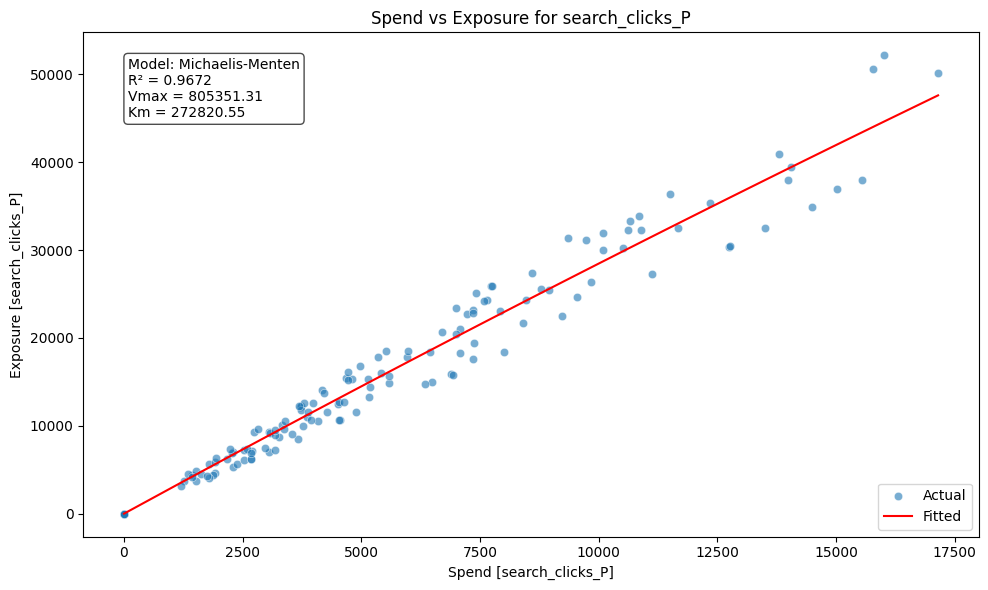

In [7]:
# Run Feature Engineering
# Initialize Robyn
robyn = Robyn(working_dir="./output")

# Initialize Robyn
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
)
# Run feature engineering with plots
featurized_data = robyn.feature_engineering(
    plot=True,
    export=False
)
robyn.featurized_mmm_data = featurized_data

In [8]:
# Run feature engineering without plots
featurized_data_no_plots = robyn.feature_engineering(
    plot=False,
    export=True
)

2024-11-15 02:08:36,103 - robyn.modeling.feature_engineering - INFO - Starting feature engineering process
2024-11-15 02:08:36,105 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2024-11-15 02:08:36,106 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
/Users/sumalreddy/workspace/Robyn/.venv/lib/python3.12/site-packages/prophet/forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
2024-11-15 02:08:36,584 - cmdstanpy - DEBUG - input tempfile: /var/folders/4q/8q62cmhx12n25wftc1qg947m0000gn/T/tmpiwfrnk4n/gdbyxc20.json
2024-11-15 02:08:36,592 - cmdstanpy - DEBUG - input tempfile: /var/folders/4q/8q62cmhx12n25wftc1qg947m0000gn/T

## Build models

2024-11-15 02:08:37,267 - robyn.modeling.base_model_executor - INFO - Initializing BaseModelExecutor
2024-11-15 02:08:37,268 - robyn.modeling.model_executor - INFO - Starting model execution with model_name=Models.RIDGE
2024-11-15 02:08:37,269 - robyn.modeling.base_model_executor - INFO - Input validation successful
2024-11-15 02:08:37,270 - robyn.common.common_util - WARNING - Requested cores (16) exceeds available cores (10). Will use 10 cores.
2024-11-15 02:08:37,270 - robyn.modeling.base_model_executor - INFO - Preparing hyperparameters
2024-11-15 02:08:37,270 - robyn.modeling.base_model_executor - INFO - Completed hyperparameter preparation with 16 parameters to optimize
2024-11-15 02:08:37,270 - robyn.modeling.model_executor - INFO - Initializing Ridge model builder
2024-11-15 02:08:37,271 - robyn.modeling.model_executor - INFO - Building models with configured parameters
2024-11-15 02:08:37,271 - robyn.modeling.ridge_model_builder - INFO - Collecting hyperparameters for optimiza

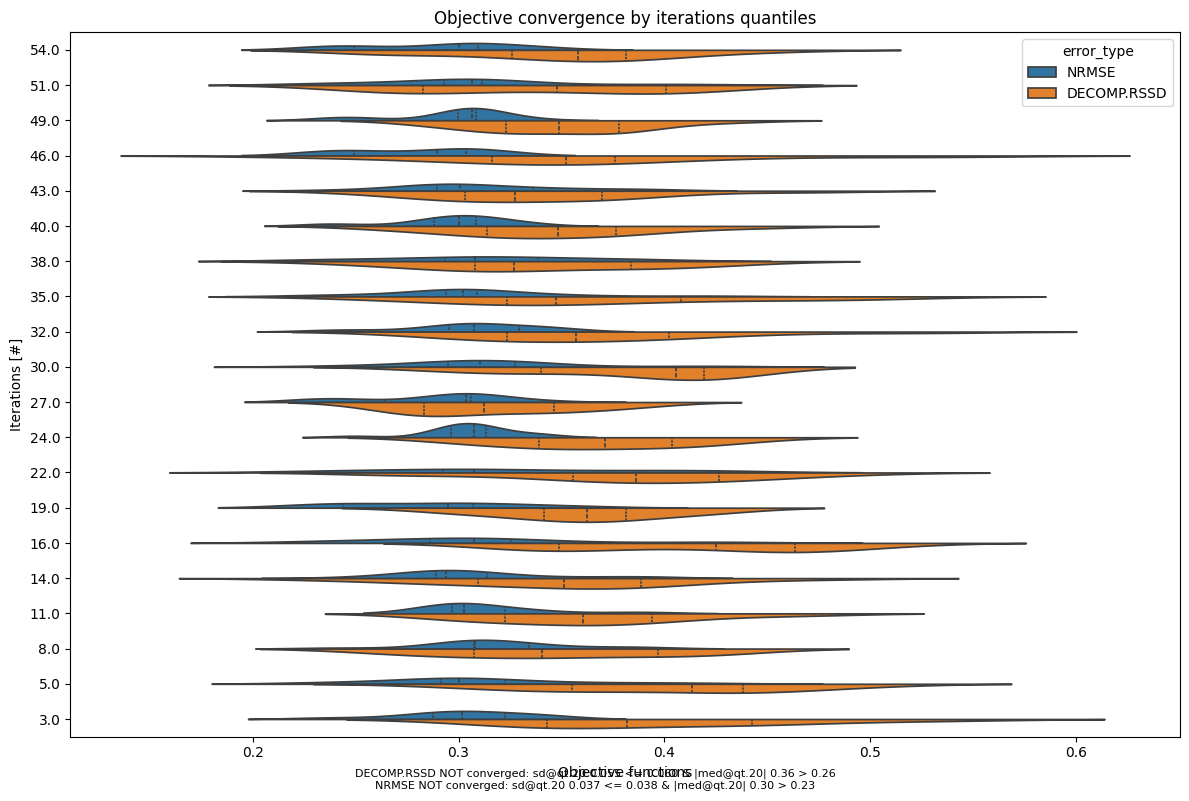

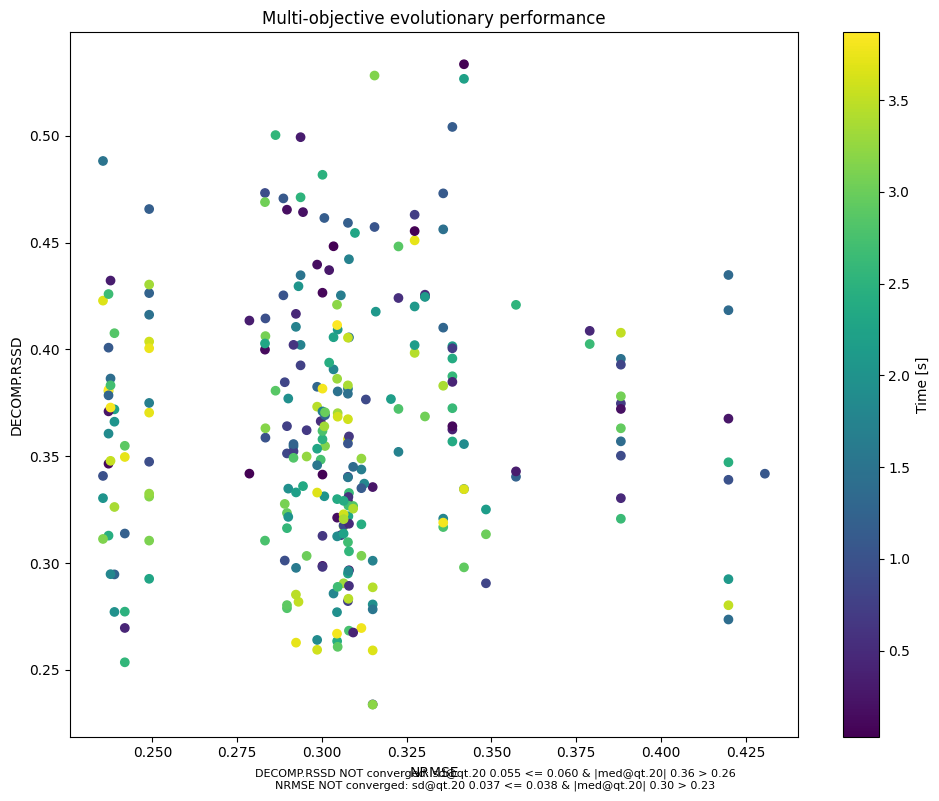

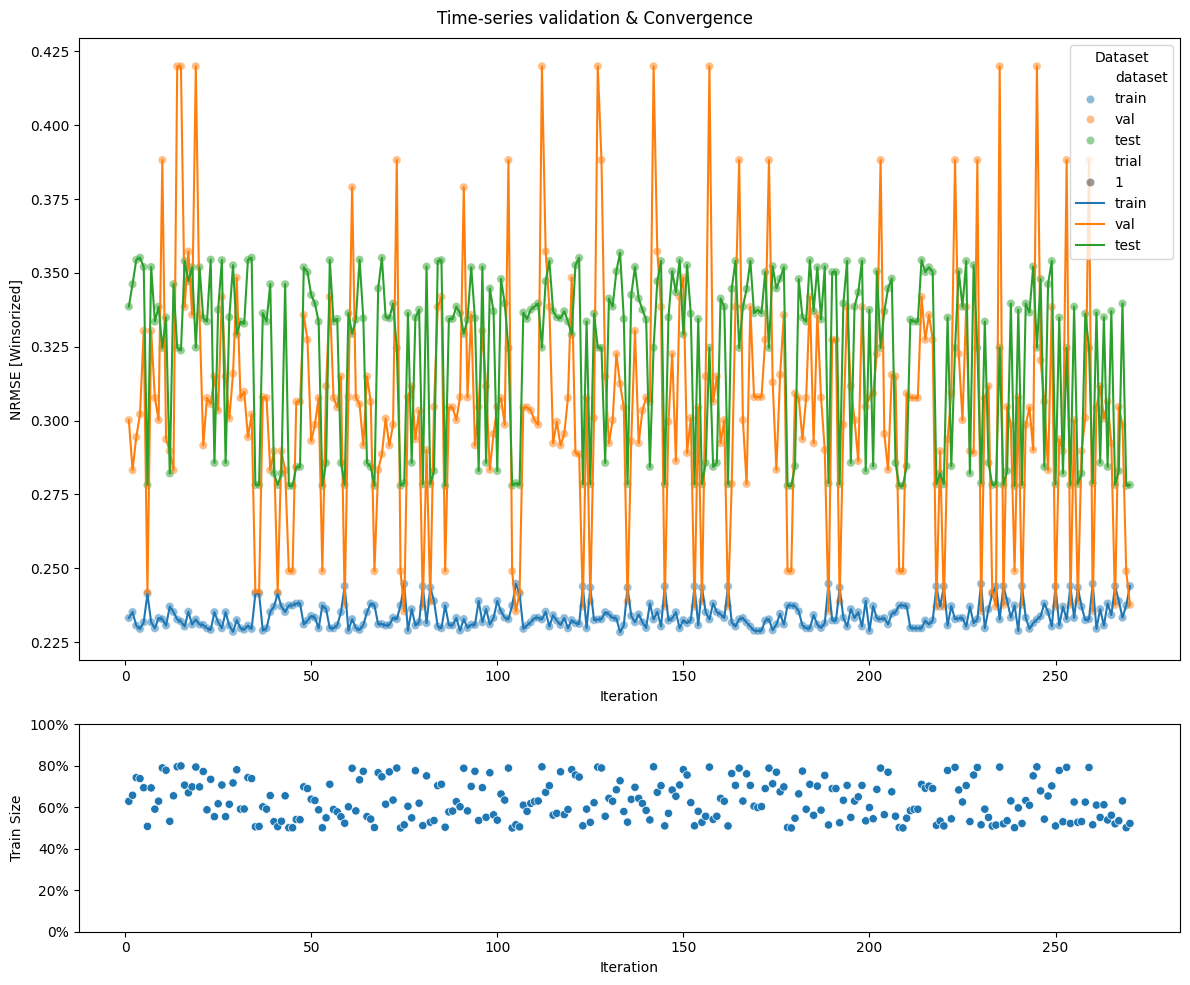

In [9]:
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig

model_outputs = robyn.build_models(
    trials_config=TrialsConfig(iterations=54, trials=5),
    plot=True,
    export=False,
)
robyn.model_outputs = model_outputs  # Store for later use


## Evaluate models

2024-11-15 02:08:58 [INFO] Starting Pareto optimization
2024-11-15 02:08:58 [INFO] Starting model data aggregation
2024-11-15 02:08:58 [INFO] Computing Pareto fronts
2024-11-15 02:08:58 [INFO] Pareto front computation completed
2024-11-15 02:08:58 [INFO] Preparing Pareto data
2024-11-15 02:08:58 [INFO] Number of Pareto-optimal solutions found: 216
2024-11-15 02:08:58 [INFO] Selected 9 Pareto-fronts containing 102 candidates
2024-11-15 02:08:58 [INFO] Filtering data for selected Pareto fronts...
2024-11-15 02:08:58 [INFO] Calculating response curves for 510 models' media variables...
Processing rows: 100%|██████████| 510/510 [00:04<00:00, 108.86it/s]
2024-11-15 02:09:03 [INFO] Successfully processed 510 response curves
2024-11-15 02:09:03 [INFO] Computing final metrics...
2024-11-15 02:09:03 [INFO] Calculating ROI and CPA metrics...
2024-11-15 02:09:03 [INFO] Starting plot data generation...
2024-11-15 02:09:03 [INFO] Processing Pareto front 1
2024-11-15 02:09:03 [INFO] Pareto-Front: 1 

Generating plots for solutions: ['1_36_1', '2_11_1', '3_17_1']


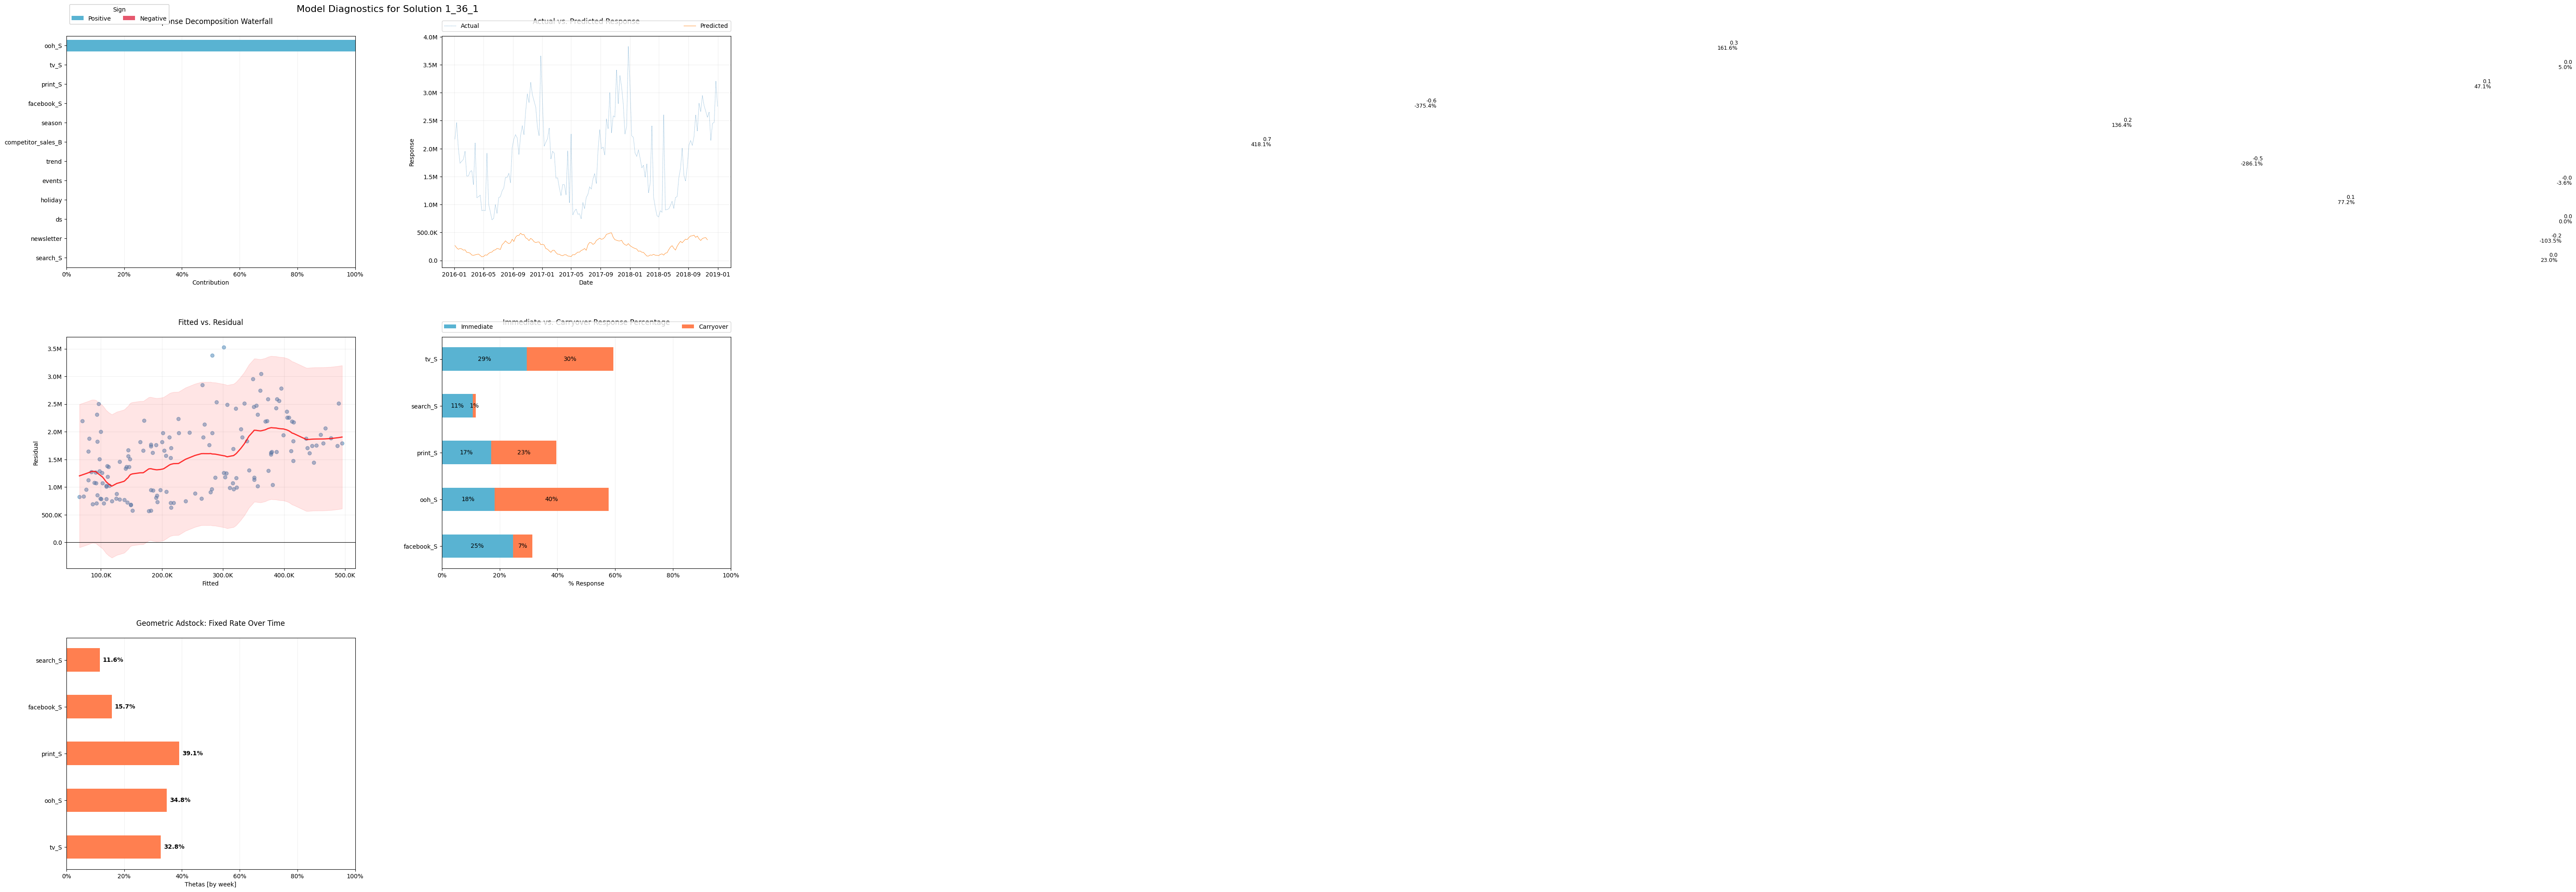

/Users/sumalreddy/workspace/Robyn/python/src/robyn/visualization/pareto_visualizer.py:636: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


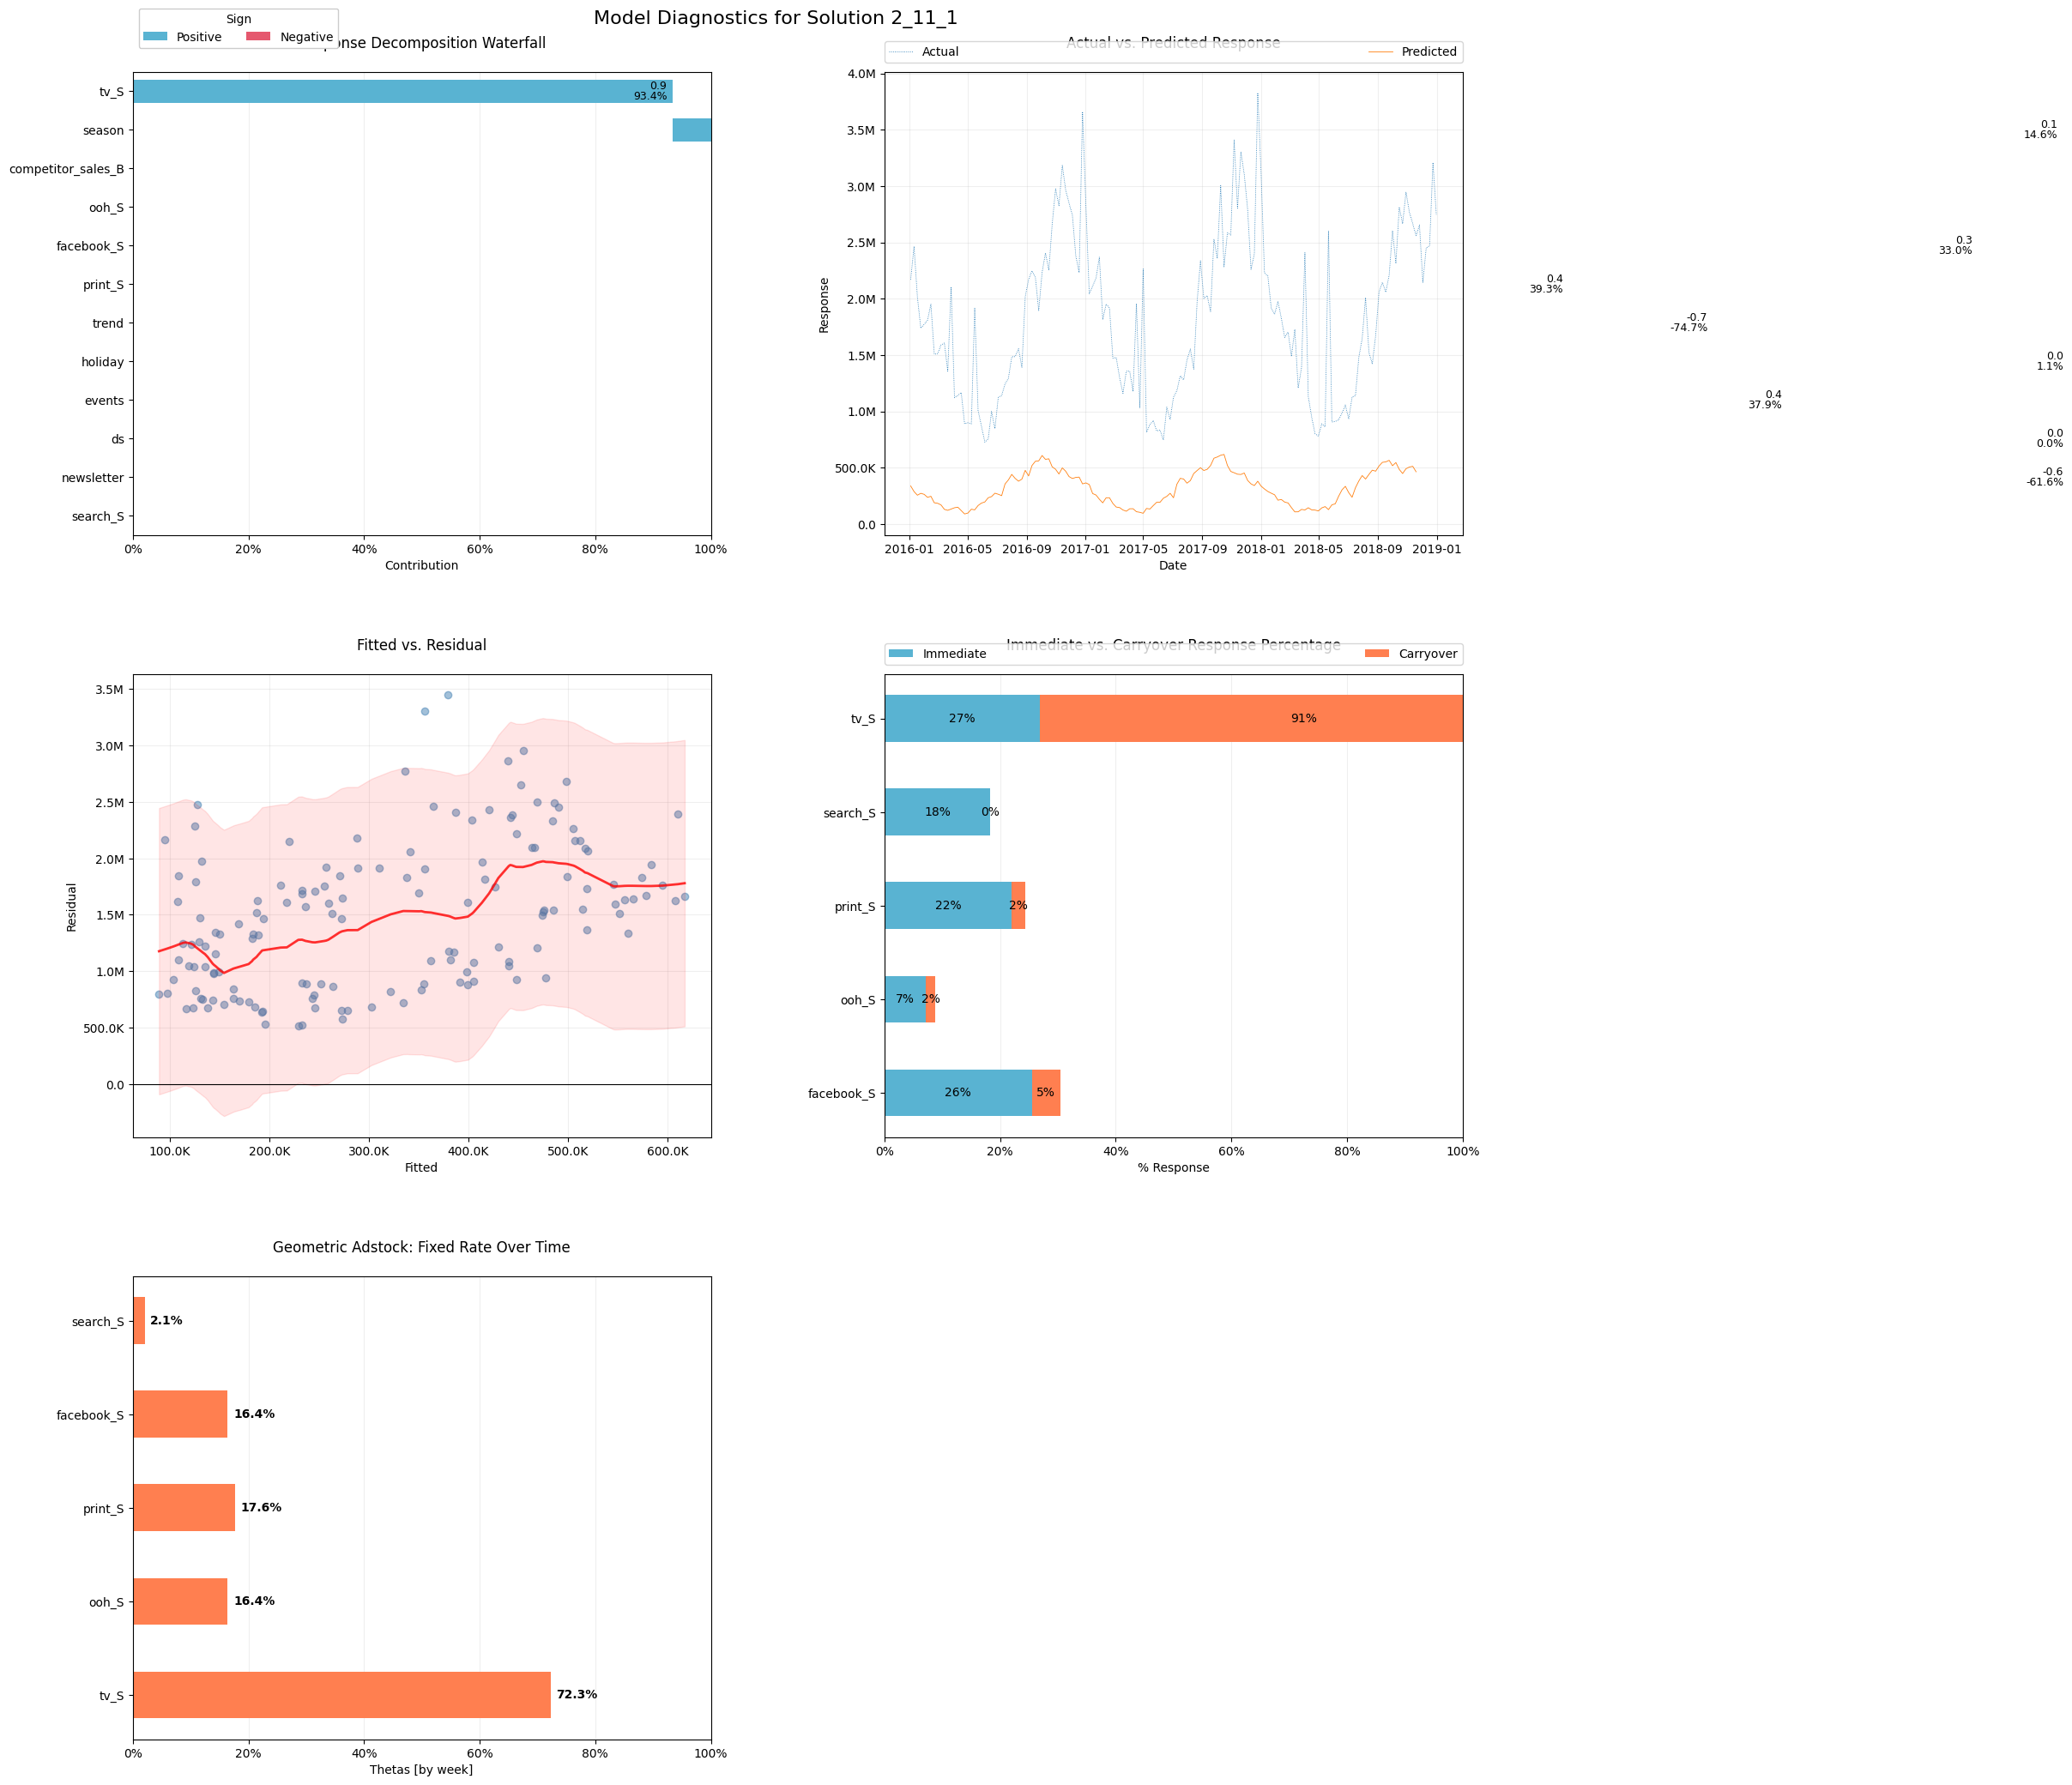

/Users/sumalreddy/workspace/Robyn/python/src/robyn/visualization/pareto_visualizer.py:636: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


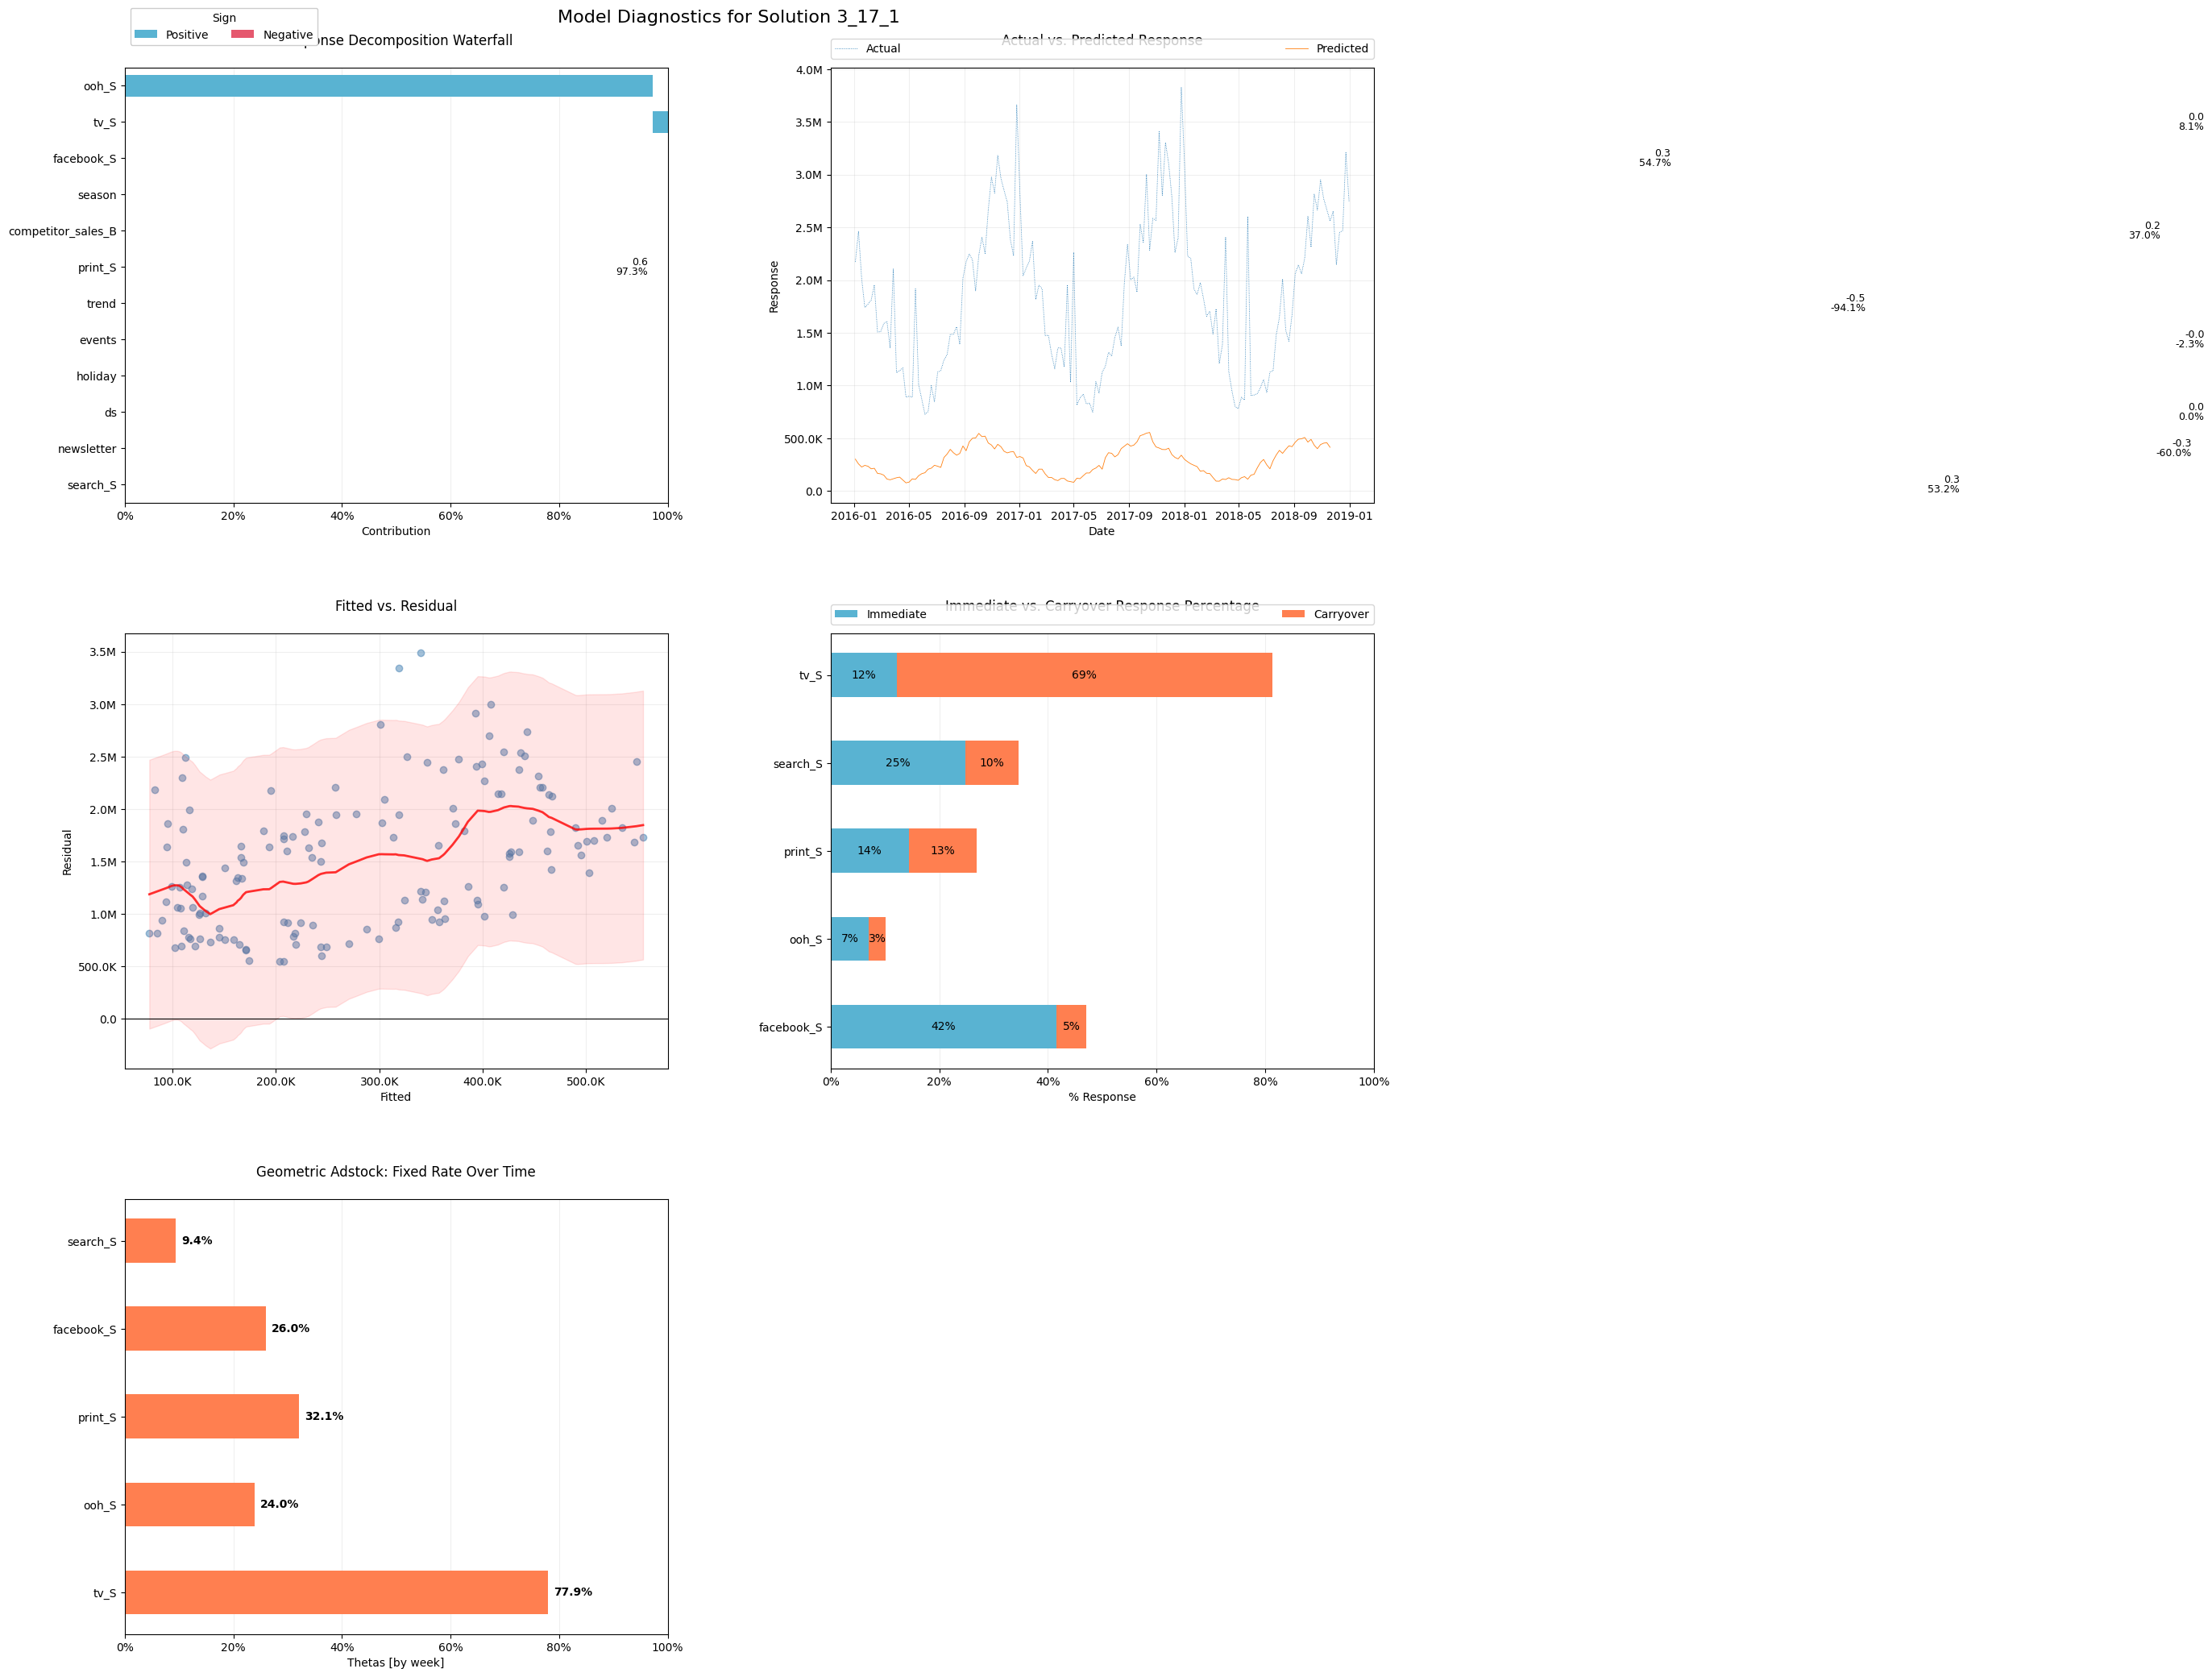

2024-11-15 02:09:13,290 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder
2024-11-15 02:09:13,291 - robyn.modeling.clustering.cluster_builder - INFO - ClusterBuilder initialization complete
2024-11-15 02:09:13,291 - robyn.modeling.clustering.cluster_builder - INFO - Starting model clustering process
2024-11-15 02:09:13,293 - robyn.modeling.clustering.cluster_builder - INFO - Clustering by: ClusterBy.HYPERPARAMETERS
2024-11-15 02:09:13,294 - robyn.modeling.clustering.cluster_builder - INFO - Starting optimal cluster selection
2024-11-15 02:09:13,295 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: pareto, nrmse_train, mape, sol_id, nrmse, decomp.rssd, nrmse_val, nrmse_test
2024-11-15 02:09:13,296 - robyn.modeling.clustering.cluster_builder - INFO - Starting WSS calculation for 30 clusters
2024-11-15 02:09:13,408 - robyn.modeling.clustering.cluster_builder - INFO - Selected optimal number of clusters: 4
2024-11-15 02:09:13,409 - robyn.

Model evaluation complete.


In [10]:
robyn.evaluate_models(plot=True, export= True)